In [1]:
using DelimitedFiles
using CairoMakie
using GLMakie
using LinearAlgebra
using Random

In [2]:
copy_size = 24

nx::Int64 = copy_size
ny::Int64 = copy_size
nz::Int64 = copy_size 

include("./introduction.jl")
include("./ir_spectra.jl")


ir_spectra (generic function with 1 method)

In [3]:
ν0 = 2135.0  #2050.0
νk::Vector{Float64} = collect(ν0- range :step:ν0 + range)
nmols_ml = 4*nx*ny*nz
Random.seed!(1234)
num = sign.(rand(nmols_ml) .- 0.5)
random_eu = num .* eu
@time ipda, isda, ip, is = ir_spectra(νk, random_eu,  com_ol, Δν) 

14990.765075 seconds (58.34 G allocations: 2.741 TiB, 0.77% gc time, 0.01% compilation time)


([3.218476169251395e-79, 2.4526446766791128e-77, 1.7682222726090458e-75, 1.2060269358734668e-73, 7.782070120619198e-72, 4.750631160392625e-70, 2.7436303430157104e-68, 1.4990567457488282e-66, 7.748699768661038e-65, 3.7892912640135497e-63  …  0.08246658402059989, 0.08174116795689662, 0.08076031675122204, 0.07954899161046641, 0.078219915403172, 0.07696610947920103, 0.07602795318682608, 0.07564233882353599, 0.0759877437444819, 0.07714044208562851], [3.245029295769494e-79, 2.4728824612455693e-77, 1.782815052922421e-75, 1.2159819640662992e-73, 7.846320866351142e-72, 4.789863772777409e-70, 2.7662951563207367e-68, 1.5114445920733652e-66, 7.81275897496131e-65, 3.82063229244157e-63  …  0.04326985638804622, 0.042926647034653466, 0.042440001825274035, 0.041928236033853115, 0.041548525881588055, 0.0414824797505891, 0.04191895534413115, 0.04303296133412338, 0.044959351211419675, 0.04776232846595572], [7.450187844136402e-79, 5.6774043871460714e-77, 4.0930782656625836e-75, 2.7916944649505788e-73, 1.80

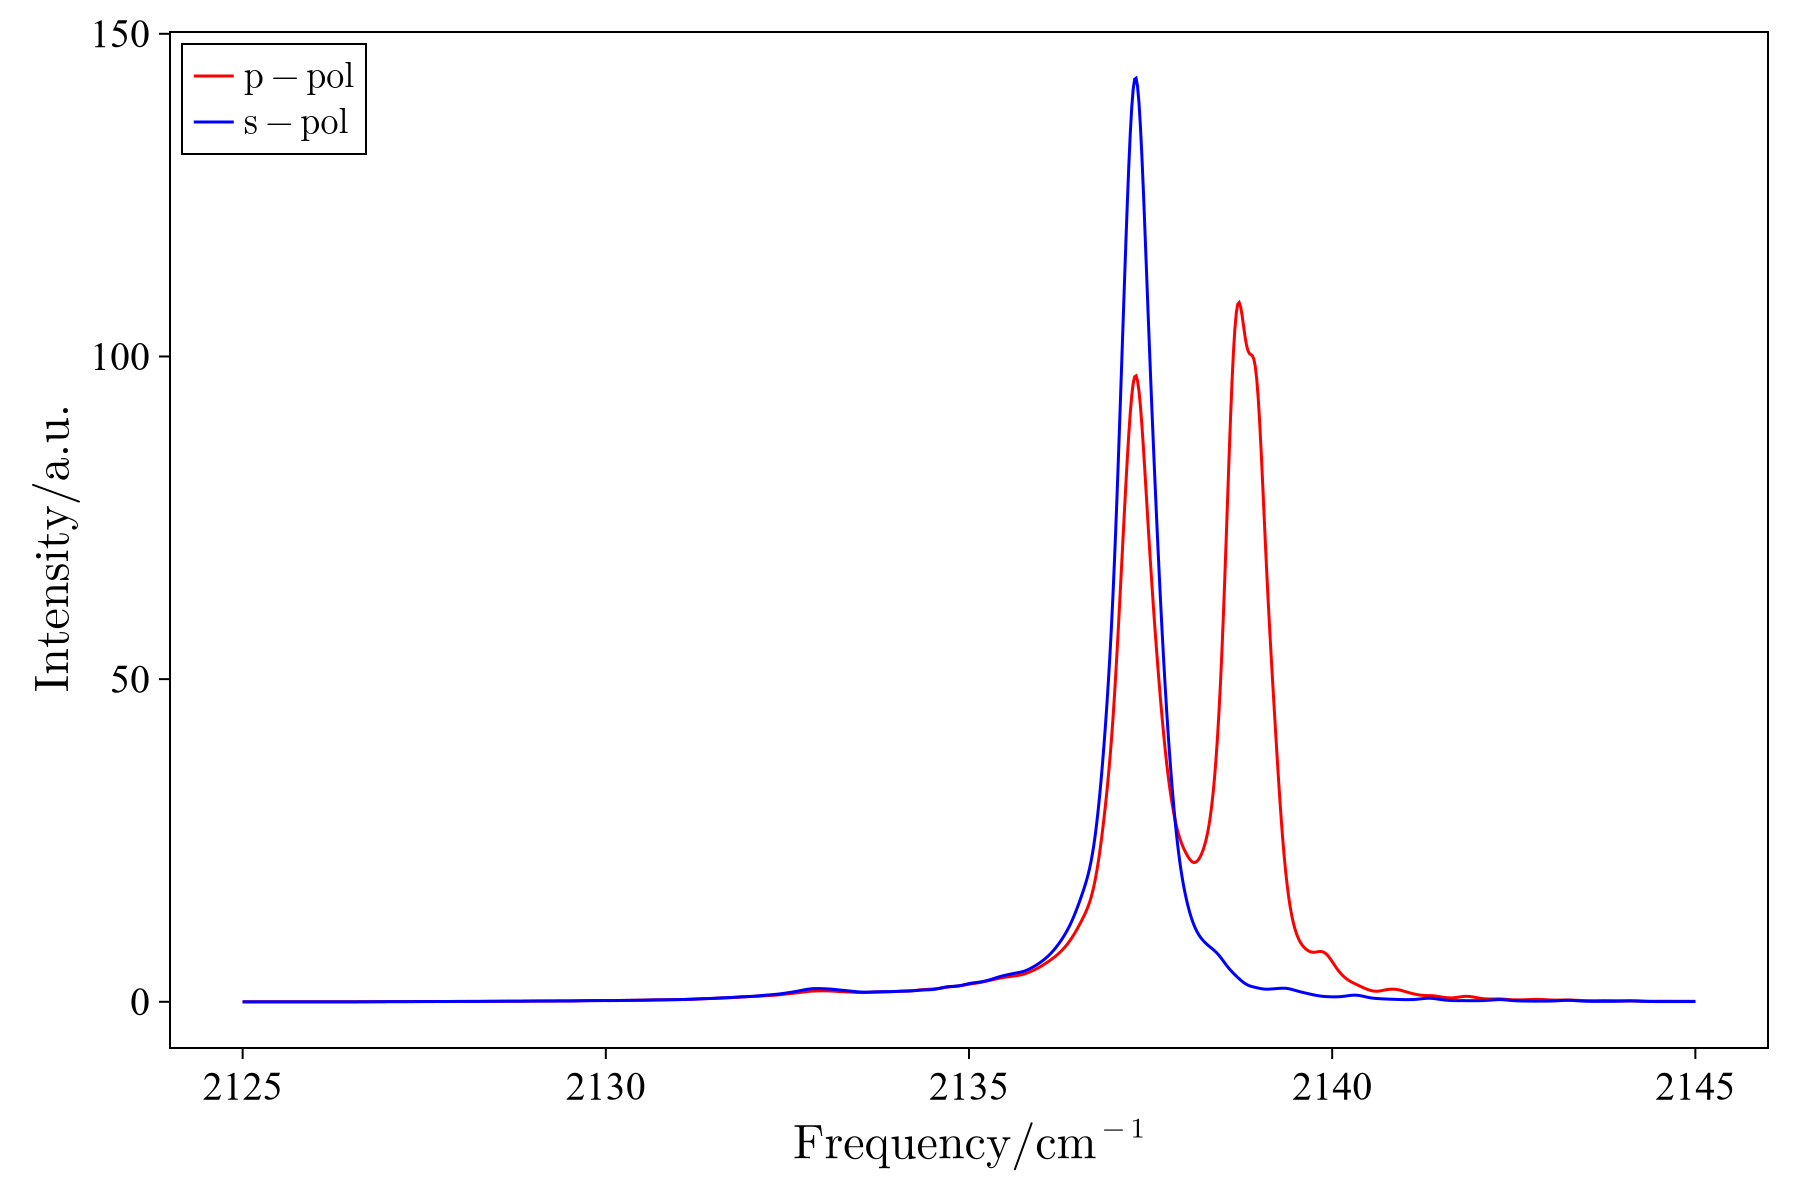

CairoMakie.Screen{IMAGE}


In [4]:
CairoMakie.activate!()
# GLMakie.activate!()
fig = Figure(size=(900, 600))

ax = Axis(fig[1,1], xlabel = L"Frequency/cm$^{-1}$", ylabel = L"Intensity/a.u. $ $", xgridvisible = false, ygridvisible = false)
ax.xlabelsize, ax.ylabelsize  = 24, 24
ax.xticklabelfont, ax.yticklabelfont = "Times New Roman", "Times New Roman"
ax.xticklabelsize, ax.yticklabelsize = 20, 20

α = 0*degrees
ipda_α = (cos(α))^2 .* ipda + (sin(α))^2 .* isda 
isda_α = (cos(α))^2 .* isda + (sin(α))^2 .* ipda 

lines!(ax, νk, ipda, color=:red, label = L"p-pol$ $")
lines!(ax, νk, isda, color=:blue, label = L"s-pol$ $")

axislegend(ax, labelsize = 18, position=:lt)
DataInspector(fig)
display(fig)

In [5]:
GLMakie.activate!()

fig = Figure()
ax = LScene(fig[1,1], show_axis = false)

meshscatter!(ax, com0_ol[:,1], com0_ol[:,2], com0_ol[:,3])

display(fig)


UndefVarError: UndefVarError: `com0_ol` not defined

In [8]:
rand()

0.9464532262313834